# Figure 5 c-e PMLR report 

Author: Pia Rautenstrauch

Date: 2022-02-10

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Figure settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=1.5, rc=custom_params)

In [3]:
# Functions
def annotated_scatterplot_manual_batchASW_site(df, x, y, fontsize=11):  
    """Annotates scatterplots of two variables of a pandas dataframe with index values, highlighting baseline models and min ranks."""
    top_rank_x = df[x].sort_values(ascending=False)[:3].index.tolist()
    top_rank_y = df[y].sort_values(ascending=False)[:3].index.tolist()
    df.plot.scatter(x, y, figsize=(8,6), c="black")
    for i in range(df.shape[0]):
        label = df.iloc[i].name
        if (( "baseline" in df.iloc[i].name) | (df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y)):
            if (label == "Transbio_NB"):
                color = "#3C81BA" if "baseline" in df.iloc[i].name else "#8e063b" if ((df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y))  else "black"

                plt.annotate(label, # this is the text
                         (df.iloc[i][x],df.iloc[i][y]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-2.5), # distance from text to points (x,y)
                         ha='left', va='top', color=color, fontsize=fontsize, weight='bold'
                ) 
            elif (label == "Living-Systems-Lab"):
                color = "#3C81BA" if "baseline" in df.iloc[i].name else "#8e063b" if ((df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y))  else "black"
                plt.annotate(label, # this is the text
                         (df.iloc[i][x],df.iloc[i][y]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,15), # distance from text to points (x,y)
                         ha='left', va='top', color=color, fontsize=fontsize, weight='bold'
                ) 

            else:
                color = "#3C81BA" if "baseline" in df.iloc[i].name else "#8e063b" if ((df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y))  else "black"
                plt.annotate(label, # this is the text
                         (df.iloc[i][x],df.iloc[i][y]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='left', va='top', color=color, fontsize=fontsize, weight='bold'
                ) 

                
def annotated_scatterplot_manual_iLISI_site(df, x, y, fontsize=11, highlight_best=False):  
    """Annotates scatterplots of two variables of a pandas dataframe with index values, highlighting baseline models and min ranks."""
    top_rank_x = df[x].sort_values(ascending=False)[:3].index.tolist()
    top_rank_y = df[y].sort_values(ascending=False)[:3].index.tolist()
    df.plot.scatter(x, y, figsize=(8,6), c="black")
    for i in range(df.shape[0]):
        label = df.iloc[i].name
        if (( "baseline" in df.iloc[i].name) | (df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y)):
            if (label == "baseline_mnn"):
                color = "#3C81BA" if "baseline" in df.iloc[i].name else "#8e063b" if ((df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y))  else "black"
                plt.annotate(label, # this is the text
                         (df.iloc[i][x],df.iloc[i][y]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,-2.5), # distance from text to points (x,y)
                         ha='left', va='top', color=color, fontsize=fontsize, weight='bold'
                )
                
            else:
                color = "#3C81BA" if "baseline" in df.iloc[i].name else "#8e063b" if ((df.iloc[i].name in top_rank_x) | (df.iloc[i].name in top_rank_y))  else "black"

                plt.annotate(label, # this is the text
                         (df.iloc[i][x],df.iloc[i][y]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='left', va='top', color=color, fontsize=fontsize, weight='bold'
                ) 

## Data setup
Load results of novel analysis of between-site batch effect removal & previous evaluation

### Newly computed scores
Top submission per team and data type.

In [10]:
novel_scores = pd.read_csv("./novel_batch_removal_scores_all_submissions.csv", index_col=0).T
novel_scores_baseline = pd.read_csv("./novel_batch_removal_scores_baselines.csv", index_col=0).T

# Load metadata of top scoring submission per team and data type - Multiome
meta = pd.read_csv("JE_multiome_output_per_team.csv").sort_values("arithmetic_mean_ATAC", ascending=False)

# Drop two methods for which we don't have results stored, but that achieved a mean of 0
meta.drop([11,2], axis=0, inplace=True)

# Evaluation missing - no evaluation for 170423 (not better than lmbds baseline, so not of interest here)
meta.drop([24], axis=0, inplace=True)

# Mapping of team names to submission ids
team_id_mapping = dict(zip(meta["Team Name"], meta["id"]))

# Cast datatype to boolean
novel_scores["recomputed"] = novel_scores["recomputed"].apply(lambda x: False if x == "False" else True)

### Previous evaluation
For some submissions, the original results of the challenge run are lost. In this cases, we recomputed the results. Note, that due to the stochastic nature of some of the models the results might thus differ from the results shown in the leaderboard.

In [11]:
df_dict = {}
for team, id in team_id_mapping.items():
    # Make sure to load the right evaluation - corresponding to the embedding used to compute the novel metrics
    if novel_scores.loc[team]['recomputed']:
        tmp_scores = pd.read_json('./recomputed_evaluation/submission_{}/output_new/evaluation/joint_embedding/output.final_scores.output_json.json'.format(id))
        tmp_scores = tmp_scores.drop(['method_id', 'arithmetic_mean', 'arithmetic_mean_ADT', 'asw_batch_ADT', 'asw_label_ADT',
                                  'cc_cons_ADT', 'graph_conn_ADT', 'nmi_ADT', 'ti_cons_batch_mean_ADT'], axis=1, errors='ignore')
    else: 
        tmp_scores = pd.read_json('./evaluation/submission_{}/output/evaluation/joint_embedding/output.final_scores.output_json.json'.format(id))
        tmp_scores = tmp_scores.drop(['method_id', 'arithmetic_mean', 'arithmetic_mean_ADT', 'asw_batch_ADT', 'asw_label_ADT',
                                  'cc_cons_ADT', 'graph_conn_ADT', 'nmi_ADT', 'ti_cons_batch_mean_ADT'], axis=1, errors='ignore')
    df_dict[team] = tmp_scores.squeeze().to_dict()

In [12]:
challenge_scores = pd.DataFrame(df_dict).T
challenge_scores.to_csv("challenge_scores_top_submissions.cvs")

In [13]:
challenge_scores

,arithmetic_mean_ATAC,asw_batch_ATAC,asw_label_ATAC,cc_cons_ATAC,graph_conn_ATAC,nmi_ATAC,ti_cons_batch_mean_ATAC
Amateur,0.8424,0.8898,0.5859,0.9195,0.9803,0.7723,0.9067
Living-Systems-Lab,0.8390,0.9351,0.5290,0.9340,0.9734,0.7605,0.9021
S_lab,0.8379,0.8925,0.5945,0.8591,0.9770,0.7944,0.9100
GLUE,0.8317,0.9100,0.5785,0.8355,0.9743,0.7754,0.9163
Guanlab-dengkw,0.8308,0.9183,0.5462,0.9212,0.9807,0.7087,0.9099
TeamRegGen,0.8240,0.8485,0.5841,0.8524,0.9588,0.7861,0.9145
balia,0.8225,0.9255,0.5335,0.8562,0.9815,0.7369,0.9012
SIMBA,0.8212,0.8674,0.5383,0.9036,0.9754,0.7448,0.8975
GarryLab,0.8150,0.8967,0.5545,0.7750,0.9747,0.7795,0.9095
LiuZ_Lab_BCM,0.8129,0.8253,0.6262,0.7864,0.9654,0.7653,0.9086


In [14]:
baseline_scores = pd.read_json('./embeddings/baseline/output.final_scores.output_json.json')
baseline_scores.set_index("method_id", inplace = True)
baseline_scores = baseline_scores.drop(['arithmetic_mean', 'arithmetic_mean_ADT', 'asw_batch_ADT', 'asw_label_ADT',
                                  'cc_cons_ADT', 'graph_conn_ADT', 'nmi_ADT', 'ti_cons_batch_mean_ADT'], axis=1, errors='ignore') 

In [18]:
# Store baseline arithmetic means
mnn_baseline = baseline_scores.loc["baseline_mnn"]["arithmetic_mean_ATAC"]
lmds_baseline = baseline_scores.loc["baseline_lmds"]["arithmetic_mean_ATAC"]
pca_baseline = baseline_scores.loc["baseline_pca"]["arithmetic_mean_ATAC"]

In [20]:
# novel_scores.drop(["recomputed", "asw_batch", "dims"], axis=1, inplace=True)
novel_scores.drop(["asw_batch", "dims"], axis=1, inplace=True)
novel_scores_baseline.drop(["asw_batch", "dims"], axis=1, inplace=True)
novel_scores_baseline = pd.DataFrame(novel_scores_baseline).astype(float)

## Combine novel scores with previous results

In [21]:
all_results = novel_scores.join(challenge_scores)

In [22]:
all_results

,recomputed,iLISI_batch,cLISI_full,iLISI_site,asw_batch_site,arithmetic_mean_ATAC,asw_batch_ATAC,asw_label_ATAC,cc_cons_ATAC,graph_conn_ATAC,nmi_ATAC,ti_cons_batch_mean_ATAC
Amateur,False,0.13463994347578245,0.9954874607163132,0.1584558908532642,0.8708147586857687,0.8424,0.8898,0.5859,0.9195,0.9803,0.7723,0.9067
Living-Systems-Lab,False,0.1685696570214211,0.9856662242589609,0.21881335061863902,0.8899680046012532,0.8390,0.9351,0.5290,0.9340,0.9734,0.7605,0.9021
S_lab,False,0.1552141552148284,0.9952404305117624,0.21875683166656912,0.878338502725972,0.8379,0.8925,0.5945,0.8591,0.9770,0.7944,0.9100
GLUE,False,0.22261419325760803,0.9955902862066518,0.3727342688554143,0.9353377968267164,0.8317,0.9100,0.5785,0.8355,0.9743,0.7754,0.9163
Guanlab-dengkw,False,0.07847411902001845,0.9936880158817202,0.017691230128100404,0.886742056181178,0.8308,0.9183,0.5462,0.9212,0.9807,0.7087,0.9099
TeamRegGen,True,0.275194464742343,0.9942844379447442,0.4611734232284445,0.8978249310286449,0.8240,0.8485,0.5841,0.8524,0.9588,0.7861,0.9145
balia,True,0.11418045083150852,0.9907811942325869,0.08753392642569217,0.8409697741742941,0.8225,0.9255,0.5335,0.8562,0.9815,0.7369,0.9012
SIMBA,False,0.1270016954063722,0.9919906363488277,0.1971818965993696,0.8705116515819769,0.8212,0.8674,0.5383,0.9036,0.9754,0.7448,0.8975
GarryLab,False,0.27007125252496506,0.990440320225729,0.4385839895977776,0.9215702203052276,0.8150,0.8967,0.5545,0.7750,0.9747,0.7795,0.9095
LiuZ_Lab_BCM,False,0.1768464393062802,0.995177474632479,0.24678768475976956,0.8339897935200214,0.8129,0.8253,0.6262,0.7864,0.9654,0.7653,0.9086


In [23]:
all_results_baseline = novel_scores_baseline.join(baseline_scores)

In [24]:
all_results_baseline

,iLISI_batch,cLISI_full,iLISI_site,asw_batch_site,arithmetic_mean_ATAC,asw_batch_ATAC,asw_label_ATAC,cc_cons_ATAC,graph_conn_ATAC,nmi_ATAC,ti_cons_batch_mean_ATAC
baseline_mnn,0.228585,0.980063,0.368968,0.905540,0.8134,0.8972,0.5362,0.9050,0.9680,0.6788,0.8952
baseline_umap,0.069554,0.988063,0.005627,0.545838,0.6399,0.6950,0.4863,0.7307,0.6292,0.5917,0.7066
baseline_lmds,0.144691,0.973223,0.159139,0.803184,0.7578,0.8397,0.5035,0.9053,0.9630,0.5717,0.7636
baseline_pca,0.085255,0.965868,0.018633,0.758366,0.7274,0.8564,0.5011,0.8773,0.9515,0.5183,0.6600
dummy_random,0.420065,0.760381,0.722869,0.995675,0.3905,0.9876,0.4977,0.0060,0.3375,0.0077,0.5067
dummy_zeros,0.570649,0.672951,0.845186,1.000000,NaN,1.0000,0.5000,NaN,0.0800,0.0148,0.5003


In [35]:
all_results = pd.concat([all_results, all_results_baseline], axis=0)
all_results.drop("recomputed", axis=1, inplace=True)
all_results = pd.DataFrame(all_results).astype(float)

In [36]:
# Spearman correlation between scores for submission scoring better than lmds baseline

In [37]:
def figure_plots(result_df, baseline):
    df = result_df.copy()
    df = df[df.arithmetic_mean_ATAC >= baseline]
    df = df.drop(['arithmetic_mean_ATAC', 'cLISI_full'], axis=1)
    # Use more readable 
    label_mapping = {
    'asw_batch_ATAC': 'batchASW sample',
    'asw_batch_site': 'batchASW site',
    'asw_label_ATAC': 'ASW label',
    'cc_cons_ATAC': 'cell cycle conservation',
    'graph_conn_ATAC': 'graph connectivity',
    'nmi_ATAC': 'NMI',
    'iLISI_site': 'iLISI site',
    'iLISI_batch': 'iLISI sample',
    'ti_cons_batch_mean_ATAC': 'trajectory conservation'}
    df = df.rename(columns=label_mapping)
    
    # Reorder for better interpretability (batchASW side by side)
    df = df[['iLISI site', 'iLISI sample', 'batchASW site', 'batchASW sample', 'graph connectivity', 'ASW label', 'NMI','trajectory conservation', 'cell cycle conservation', ]]
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(df.corr(method="spearman"), center=0.0, vmin=-1, vmax=1, annot=True)
    plt.savefig('2022_PMLR_report_Figure3c_Supplement.png', dpi=300, transparent=True, bbox_inches='tight')
    
    f, ax = plt.subplots(figsize=(7.5, 6))
    ax = sns.heatmap(df[['iLISI site', 'iLISI sample', 'batchASW site', 'batchASW sample', 'graph connectivity']].corr(method="spearman"), center=0.0, vmin=-1, vmax=1, annot=True)
    plt.savefig('2022_PMLR_report_Figure3c.png', dpi=300, transparent=True, bbox_inches='tight')


    annotated_scatterplot_manual_batchASW_site(df, "batchASW sample", "batchASW site", fontsize=14)
    plt.savefig('2022_PMLR_report_Figure3d_manual_final.png', dpi=300, transparent=True, bbox_inches='tight')
    

    annotated_scatterplot_manual_iLISI_site(df, "batchASW sample", "iLISI site", fontsize=14)
    plt.savefig('2022_PMLR_report_Figure3e_manual_final.png', dpi=300, transparent=True, bbox_inches='tight')
    


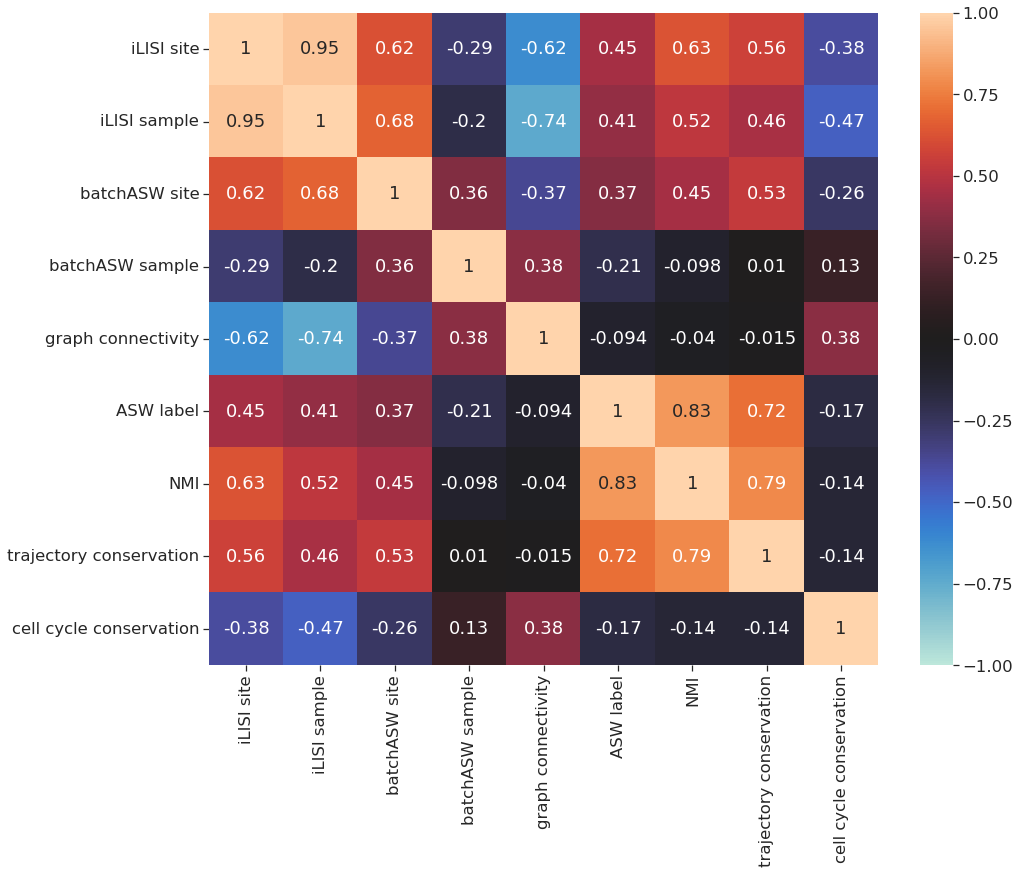

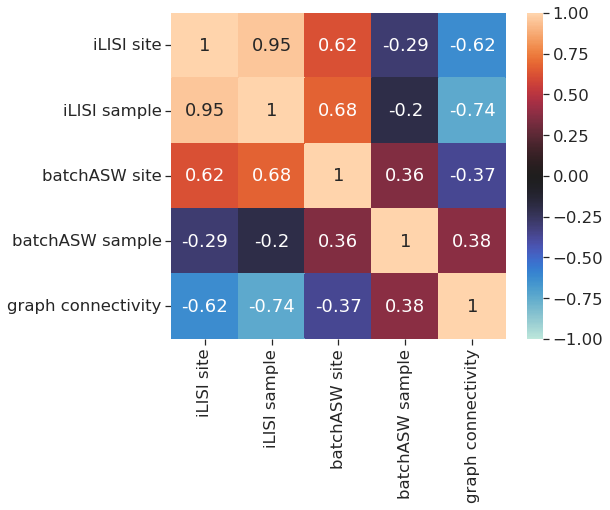

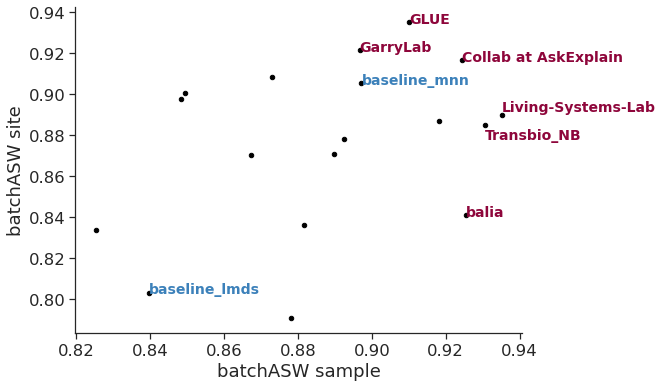

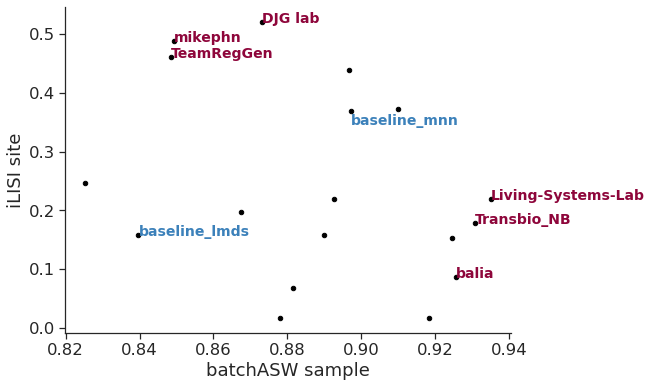

In [38]:
figure_plots(all_results, lmds_baseline)